<a href="https://colab.research.google.com/github/Aya11ali/Titanic_Survival_Prediction/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
titanic_data = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic_data.shape

(891, 12)

In [93]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To make column names more descriptive and human-readable.

In [94]:
titanic_data.rename(columns={
    'PassengerId': 'passenger_id',
    'Survived': 'survived', # 1 = survived, 0 = died
    'Pclass': 'passenger_class', # 	Ticket class (1st, 2nd, 3rd)
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'SibSp': 'siblings_spouses', # Number of siblings/spouses aboard
    'Parch': 'parents_children', # 	Number of parents/children aboard
    'Ticket': 'ticket_number',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarkation_port' # Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
}, inplace=True)


In [95]:
titanic_data.describe()

,passenger_id,survived,passenger_class,age,siblings_spouses,parents_children,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**age** has only 714 values (not 891), which means ~20% of passengers have missing age

**survived** mean = 0.38 → ~38% survived, so the dataset is slightly imbalanced toward non-survivors.

Visual Summary of Missing Data

<Axes: >

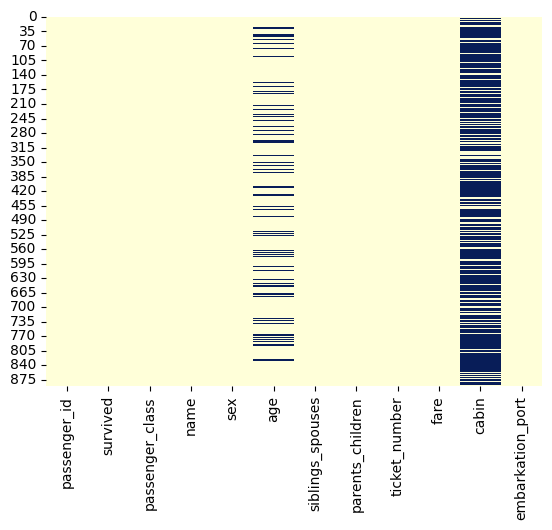

In [96]:

sns.heatmap(titanic_data.isnull(), cbar=False, cmap="YlGnBu")


In [97]:
import plotly.express as px

px.histogram(
    titanic_data,
    x="passenger_class",
    color="survived",
    barmode="group",
    color_discrete_map={0: 'crimson', 1: 'mediumseagreen'},
    title="Survival Count by Passenger Class",
    labels={'passenger_class': 'Passenger Class', 'count': 'Number of Passengers', 'survived': 'Survived'},
    template='plotly_white'
).update_layout(
    xaxis=dict(dtick=1),
    width=700,
    height=500
).show()


In [98]:
import plotly.graph_objects as go

bin_size = 5
x_start = 0
x_end = 85

fig = go.Figure()

# Not Survived
fig.add_trace(go.Histogram(
    x=titanic_data[titanic_data['survived'] == 0]['age'],
    name='Not Survived',
    opacity=0.6,
    marker_color='crimson',
    xbins=dict(start=x_start, end=x_end, size=bin_size),
    histnorm='percent'  # Normalize to show distribution, not raw counts
))

# Survived
fig.add_trace(go.Histogram(
    x=titanic_data[titanic_data['survived'] == 1]['age'],
    name='Survived',
    opacity=0.6,
    marker_color='mediumseagreen',
    xbins=dict(start=x_start, end=x_end, size=bin_size),
    histnorm='percent'
))

fig.update_layout(
    title='Age Distribution by Survival (%)',
    xaxis_title='Age (years)',
    yaxis_title='Percentage of Group',
    barmode='overlay',
    bargap=0.05,
    template='plotly_white',
    legend=dict(title='Survival Status'),
    width=800,
    height=500
)

fig.show()


In [99]:
import numpy as np
titanic_data['fare_log'] = np.log1p(titanic_data['fare'])  # log1p handles 0

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=titanic_data[titanic_data['survived'] == 0]['fare_log'],
    name='Not Survived',
    opacity=0.6,
    marker_color='crimson',
    histnorm='percent',
    xbins=dict(size=0.2)
))

fig.add_trace(go.Histogram(
    x=titanic_data[titanic_data['survived'] == 1]['fare_log'],
    name='Survived',
    opacity=0.6,
    marker_color='mediumseagreen',
    histnorm='percent',
    xbins=dict(size=0.2)
))

fig.update_layout(
    title='Log Fare Distribution by Survival (%)',
    xaxis_title='Log(Fare + 1)',
    yaxis_title='Percentage of Group',
    barmode='overlay',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


titanic_data.drop(columns=['fare_log'], inplace=True)

| Feature             | Relationship to Survival                |
| ------------------- | --------------------------------------- |
| **Age**             | Young children more likely to survive   |
| **Passenger Class** | 1st class had higher survival           |
| **Fare**            | Higher fare → higher chance of survival |


In [100]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passenger_id      891 non-null    int64  
 1   survived          891 non-null    int64  
 2   passenger_class   891 non-null    int64  
 3   name              891 non-null    object 
 4   sex               891 non-null    object 
 5   age               714 non-null    float64
 6   siblings_spouses  891 non-null    int64  
 7   parents_children  891 non-null    int64  
 8   ticket_number     891 non-null    object 
 9   fare              891 non-null    float64
 10  cabin             204 non-null    object 
 11  embarkation_port  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
      return self

    def transform(self,x):
      imputer = SimpleImputer(strategy='mean')
      x['age'] = imputer.fit_transform(x[['age']])
      return x

In [102]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
      return self

    def transform (self, x):
      encoder = OneHotEncoder()
      matrix = encoder.fit_transform(x[['embarkation_port']]).toarray()

      column_names = ['C', 'S', 'Q', 'N']

      for i in range (len(matrix.T)):
        x[column_names[i]] = matrix.T[i]

      matrix = encoder.fit_transform(x[['sex']]).toarray()

      column_names = ['female', 'male']


      for i in range (len(matrix.T)):
        x[column_names[i]] = matrix.T[i]

      return x

In [103]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
      return self

    def transform(self, x):
      return x.drop(columns=['embarkation_port', 'passenger_id', 'name', 'ticket_number', 'cabin','N','sex'], axis = 1, errors ='ignore')


In [104]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('feature_encoder', FeatureEncoder()),
    ('feature_dropper', FeatureDropper())
])

To automate and chain the preprocessing steps into a single, reusable pipeline.

Why:

Keeps the preprocessing modular and clean.

Ensures consistency when applying to training and test data.

Makes integration with **GridSearchCV**, **train_test_split**, and model training easier.

In [105]:
numeric_df = titanic_data.select_dtypes(include=np.number)
numeric_df.head()

,passenger_id,survived,passenger_class,age,siblings_spouses,parents_children,fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


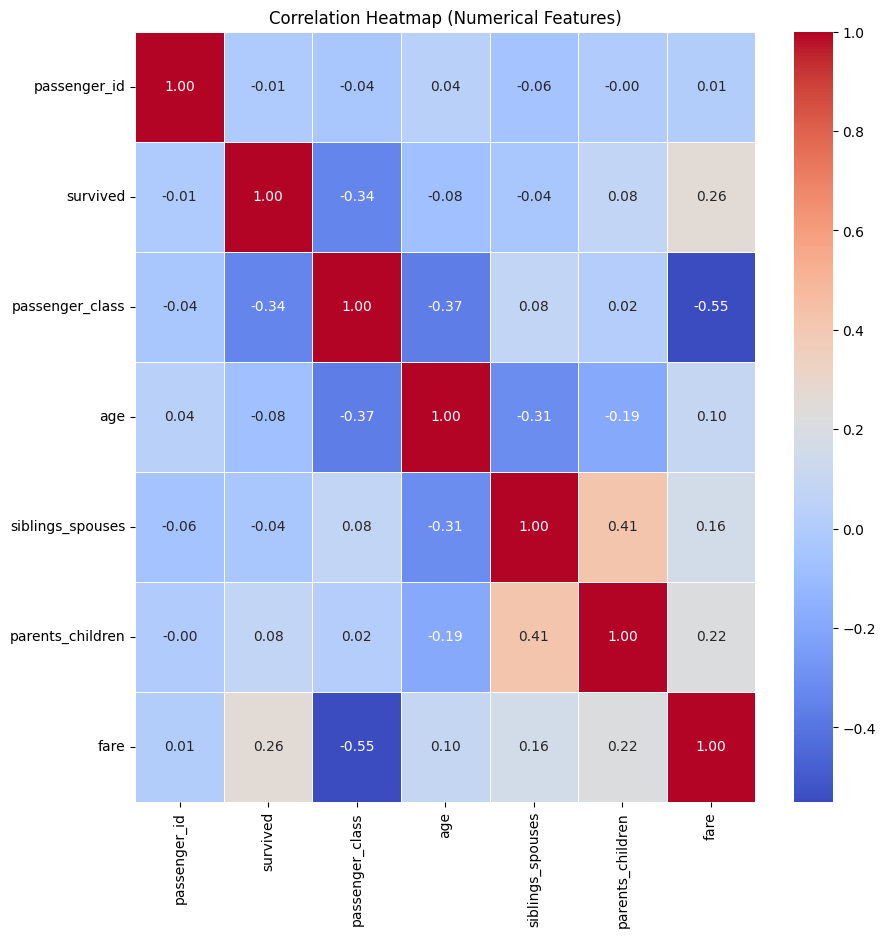

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

split  = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 , random_state = 27)

for train_indices, test_indices in split.split(titanic_data, titanic_data[['survived','passenger_class','sex']]):
    train_df = titanic_data.loc[train_indices]
    test_df = titanic_data.loc[test_indices]

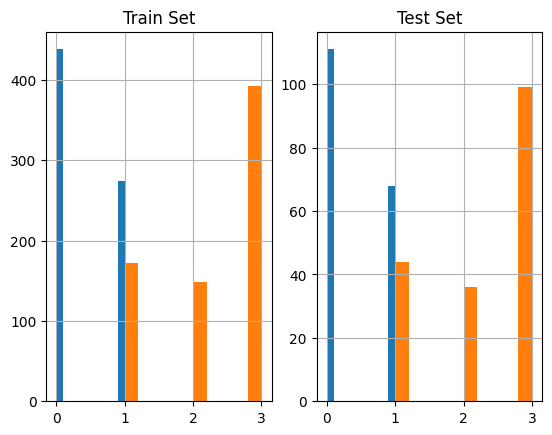

In [108]:
plt.subplot(1,2,1)
train_df['survived'].hist()
train_df['passenger_class'].hist()
plt.title('Train Set')

plt.subplot(1,2,2)
test_df['survived'].hist()
test_df['passenger_class'].hist()
plt.title('Test Set')
plt.show()

In [109]:
train_df = pipeline.fit_transform(train_df)
train_df.head()

,survived,passenger_class,age,siblings_spouses,parents_children,fare,C,S,Q,female,male
787,0,3,8.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
126,0,3,29.328944,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
515,0,1,47.000000,0,0,34.0208,0.0,0.0,1.0,0.0,1.0
542,0,3,11.000000,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
508,0,3,28.000000,0,0,22.5250,0.0,0.0,1.0,0.0,1.0


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 787 to 363
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          712 non-null    int64  
 1   passenger_class   712 non-null    int64  
 2   age               712 non-null    float64
 3   siblings_spouses  712 non-null    int64  
 4   parents_children  712 non-null    int64  
 5   fare              712 non-null    float64
 6   C                 712 non-null    float64
 7   S                 712 non-null    float64
 8   Q                 712 non-null    float64
 9   female            712 non-null    float64
 10  male              712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB


In [111]:
from sklearn.preprocessing import StandardScaler

x = train_df.drop(columns=['survived'], axis = 1)
y = train_df['survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10, 100, 200, 500],
     "max_depth" : [None,5,10],
     "min_samples_split" : [2,3,4]}

]

gird_search = GridSearchCV(random_forest, param_grid, cv =3 , scoring = 'accuracy', return_train_score = True)
gird_search.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [113]:
test_df = pipeline.fit_transform(test_df)
test_df.head()

,survived,passenger_class,age,siblings_spouses,parents_children,fare,C,S,Q,female,male
59,0,3,11.0,5,2,46.9000,0.0,0.0,1.0,0.0,1.0
691,1,3,4.0,0,1,13.4167,1.0,0.0,0.0,1.0,0.0
467,0,1,56.0,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
171,0,3,4.0,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
883,0,2,28.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0


In [114]:
x_test = test_df.drop(columns=['survived'], axis = 1)
y_test = test_df['survived']

scaler = StandardScaler()
x_data_test = scaler.fit_transform(x_test)
y_data_test = y_test.to_numpy()

In [115]:
final_random_forest = gird_search.best_estimator_
final_random_forest.score(x_data_test, y_data_test)

0.8268156424581006

In [116]:
titanic_data = pipeline.fit_transform(titanic_data)
titanic_data.head()

,survived,passenger_class,age,siblings_spouses,parents_children,fare,C,S,Q,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [117]:
x_final = titanic_data.drop(columns=['survived'], axis = 1)
y_final = titanic_data['survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()

In [118]:
prod_random_forest = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10, 100, 200, 500],
     "max_depth" : [None,5,10],
     "min_samples_split" : [2,3,4]}

]

gird_search = GridSearchCV(prod_random_forest, param_grid, cv =3 , scoring = 'accuracy', return_train_score = True)
gird_search.fit(x_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [119]:
prod_final_random_forest = gird_search.best_estimator_
prod_final_random_forest.score(x_data_final, y_data_final)

0.9090909090909091

# Testing

In [120]:
titanic_test_data = pd.read_csv('/content/test.csv')
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
titanic_test_data.rename(columns={
    'PassengerId': 'passenger_id',
    'Survived': 'survived', # 1 = survived, 0 = died
    'Pclass': 'passenger_class', # 	Ticket class (1st, 2nd, 3rd)
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'SibSp': 'siblings_spouses', # Number of siblings/spouses aboard
    'Parch': 'parents_children', # 	Number of parents/children aboard
    'Ticket': 'ticket_number',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarkation_port' # Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
}, inplace=True)


In [122]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data.head()

,passenger_class,age,siblings_spouses,parents_children,fare,C,S,Q,female,male
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [123]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method='ffill')

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

/tmp/ipython-input-123-3004417076.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [124]:
predictions = prod_final_random_forest.predict(x_data_final_test)

final_df = pd.DataFrame({'PassengerId': titanic_test_data['passenger_id'], 'Survived': predictions})
final_df.to_csv('submission.csv', index=False)